### 필요한 라이브러리

In [1]:
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt
from tqdm import tqdm

### 필요한 변수

In [2]:
product = 28
job_time =[[5,190,5,30,0,0,5,5],[5,190,5,30,0,0,5,5],[5,190,5,30,0,0,5,5],[5,190,5,30,0,0,5,5],[5,190,5,30,0,0,5,5],
           [5,190,5,25,0,0,5,5],[5,190,5,25,0,0,5,5],[5,190,5,25,0,0,5,5],
           [5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],
           [5,190,3,0,5,90,10,5],
           [5,190,5,40,0,90,10,7],[5,190,5,40,0,90,10,7],[5,190,5,40,0,90,10,7],
           [5,190,5,30,0,0,2,5],[5,190,5,30,0,0,2,5],[5,190,5,30,0,0,2,5],
           [5,190,5,30,0,0,10,5],
           [5,190,10,20,0,0,5,5],[5,190,10,20,0,0,5,5],
           [5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5],[5,190,7,15,1,0,5,5]]

# Create Chromosome

In [3]:
def start_time_set(product,step,unit):
    start_dict = {}
    
    for idx, value in enumerate(chromo[step-1]):
        start_dict[idx] = value
    
    sort_start = sorted(chromo[step-1])
    
    sort_next_start = [0]*product
    
    start_dict_copy = start_dict.copy()
        
    for p in range(product):
        for key,value in start_dict_copy.items():
            if value == sort_start[p]:
                start_product_index=key
                start_dict_copy[key]=10000
                break
        sort_next_start[p]=sort_start[p]+job_time[start_product_index][step-1]
        if p >= unit:
            if sort_next_start[p-unit]>sort_start[p]:
                sort_next_start[p]=sort_next_start[p-unit]+job_time[start_product_index][step-1]
    
    reorder = [0]*product

    for p in range(product):
        for key,value in start_dict.items():
            if value == sort_start[p]:
                start_product_index=key
                start_dict[key]=10000
                break
        reorder[start_product_index] = sort_next_start[p]
    
    return reorder

In [4]:
def chromosome(product=product):
    result=[]
    #1단계 시작시간
    first_step_start = [i for i in range(0,5*product,5)]
    
    for p in range(product):
        first_start = random.choice(first_step_start)
        result.append(first_start)
        first_step_start.remove(first_start)
    return result

In [5]:
def stack(chromosome,product=product):
    
    global chromo
    
    chromo=[[],[],[],[],[],[],[],[],[]]
    
    chromo[0] = chromosome
    #1단계 완료시간
    chromo[1] = start_time_set(product,1,1)
    
    #2단계 완료시간
    chromo[2] = start_time_set(product,2,15)
    
    #3단계 완료시간
    chromo[3] = start_time_set(product,3,2)
    
    #4단계 완료시간
    chromo[4] = start_time_set(product,4,3)
    
    #5단계 완료시간
    chromo[5] = start_time_set(product,5,1)
    
    #6단계 완료시간
    chromo[6] = start_time_set(product,6,15)
    
    #7단계 완료시간
    chromo[7] = start_time_set(product,7,2)
    
    #8단계 완료시간
    chromo[8] = start_time_set(product,8,1)
    
    return chromo

# Calculate fitness function

In [6]:
def fitness_function(chr_):
    result=stack(chr_)
    return max(result[8])

In [7]:
test_population=[chromosome() for i in range(20)]
fitness_function(test_population[0])

569

# Genetic algorithm - Selection

In [8]:
def selection(population, min_repair=5):
    
    population_size = len(population) - min_repair
    select_list=[]
    
    population_fitness = [fitness_function(i) for i in population]
    population_fit_reciprocal = [ 1/i for i in population_fitness]
    population_fit_pro = [i/sum(population_fit_reciprocal) for i in population_fit_reciprocal]
    population_fit_pro_sort = sorted(population_fit_pro, reverse=True)
    chromosome_index_list=[population_fit_pro.index(i) for i in population_fit_pro_sort]
    prop = 0
    pro_cumulative_sum = [0]
    for i in population_fit_pro_sort:
        prop += i
        pro_cumulative_sum.append(prop)
    
    for i in range(min_repair):
        select_list.append(population[population_fitness.index(min(population_fitness))])
    
    select_pro = [random.random() for i in range(population_size)]
    select_pro = sorted(select_pro)
    
    for i in range(len(pro_cumulative_sum)-1):
        for j in select_pro:
            if pro_cumulative_sum[i] < j <= pro_cumulative_sum[i+1]:
                select_index = chromosome_index_list[i]
                select_list.append(population[select_index])
                
    return select_list

In [9]:
test_selection_population = selection(test_population)
for i in test_selection_population:
    print(fitness_function(i))

547
547
547
547
547
554
554
559
569
569
574
574
577
583
589
604
607
612
612
612


# Genetic algorithm - Cross Over

In [10]:
def cross_over(population, product=product):
    cross_over_population = copy.deepcopy(population)
    population_size = len(population)
    
    crossover_pro = [random.random() for i in range(population_size)]
    
    crossover_gene = np.random.randint(0, product, size = (population_size, 2))
    crossover_gene = np.sort(crossover_gene,axis = 1).tolist()
    
    for i in range(population_size):
        if crossover_pro[i] > 0.5:
            crossover_index_1 = crossover_gene[i][0]
            crossover_index_2 = crossover_gene[i][1]

            value_1 = population[i][crossover_index_1]
            value_2 = population[i][crossover_index_2]
            cross_over_population[i][crossover_index_2] = value_1
            cross_over_population[i][crossover_index_1] = value_2
    
    cross_over_population_fitness = [fitness_function(i) for i in cross_over_population]
    cross_over_population_fitness_sort = sorted(cross_over_population_fitness)
    chromosome_index_list=[cross_over_population_fitness.index(i) for i in cross_over_population_fitness_sort]
    result_list=[cross_over_population[i] for i in chromosome_index_list]
    
    return result_list

In [11]:
test_crossover_population = cross_over(test_selection_population)
for i in test_crossover_population:
    print(fitness_function(i))

537
547
547
547
547
547
554
554
569
569
574
574
577
583
589
604
607
612
612
612


# Genetic algorithm - Mutation

In [12]:
def mutation(population):
    mutation_population = copy.deepcopy(population)
    N = len(population)
    
    mutation_pro = [random.random() for i in range(N)]
    
    for i in range(N):
        if mutation_pro[i] > 0.7:
            mutation_gene = np.random.randint(0, product-2)
            
            result=[]

            mutation_choice = mutation_population[i][mutation_gene:]
            
            for p in range(len(mutation_choice)):
                first_start = random.choice(mutation_choice)
                result.append(first_start)
                mutation_choice.remove(first_start)
            
            mutation_population[i][mutation_gene:] = result
            
        else:
            pass
            
    mutation_population_fitness = [fitness_function(i) for i in mutation_population]
    mutation_population_fitness_sort = sorted(mutation_population_fitness)
    chromosome_index_list=[mutation_population_fitness.index(i) for i in mutation_population_fitness_sort]
    result_list=[mutation_population[i] for i in chromosome_index_list]
    
    return result_list

In [13]:
test_mutation_population = mutation(test_crossover_population)
for i in test_mutation_population:
    print(fitness_function(i))

537
545
554
554
569
569
574
574
574
574
574
577
583
592
592
607
608
617
617
617


# Iteration Genetic algorithm

In [14]:
now_population = [chromosome() for i in range(20)]
for i in tqdm(range(101)):
    fitness_list = []
    for chromosome_ in now_population:
        fitness_list.append(fitness_function(chromosome_))
    min_chromosome_fit=min(fitness_list)
    best_chromosome=now_population[fitness_list.index(min_chromosome_fit)] #현재까지 가장 좋은 경로
    if i % 50 == 0:
        print(f"현재 {i+1}번째 반복 중 가장 좋은 목적 함수 값 :", min_chromosome_fit)
    next_population=[]
    selection_population=selection(now_population)
    next_population += selection_population[:4]
    cross_over_population=cross_over(selection_population)
    next_population += cross_over_population[:4]
    mutation_population=mutation(cross_over_population)
    next_population += mutation_population[:2]
    next_population += [chromosome() for i in range(10)]
    now_population = next_population
best_chromosome_df = pd.DataFrame(best_chromosome)
best_chromosome_df.to_csv("best_chromosome.csv",header= True, index=False)

  1%|          | 1/101 [00:00<00:12,  8.07it/s]

현재 1번째 반복 중 가장 좋은 목적 함수 값 : 542


  7%|▋         | 7/101 [00:00<00:15,  6.25it/s]

 50%|█████     | 51/101 [00:07<00:05,  8.52it/s]

현재 51번째 반복 중 가장 좋은 목적 함수 값 : 497


100%|██████████| 101/101 [00:15<00:00,  6.44it/s]

현재 101번째 반복 중 가장 좋은 목적 함수 값 : 497


# Gantt Chart

In [15]:
product_index = [f'P_{i+1}' for i in range(product)]
best_chromosome = stack(best_chromosome)
process_t = np.array(job_time).T
for i in range(8):
    for j in range(product):
        best_chromosome[i+1][j] = best_chromosome[i+1][j]-job_time[j][i]
process_st = best_chromosome[1:]

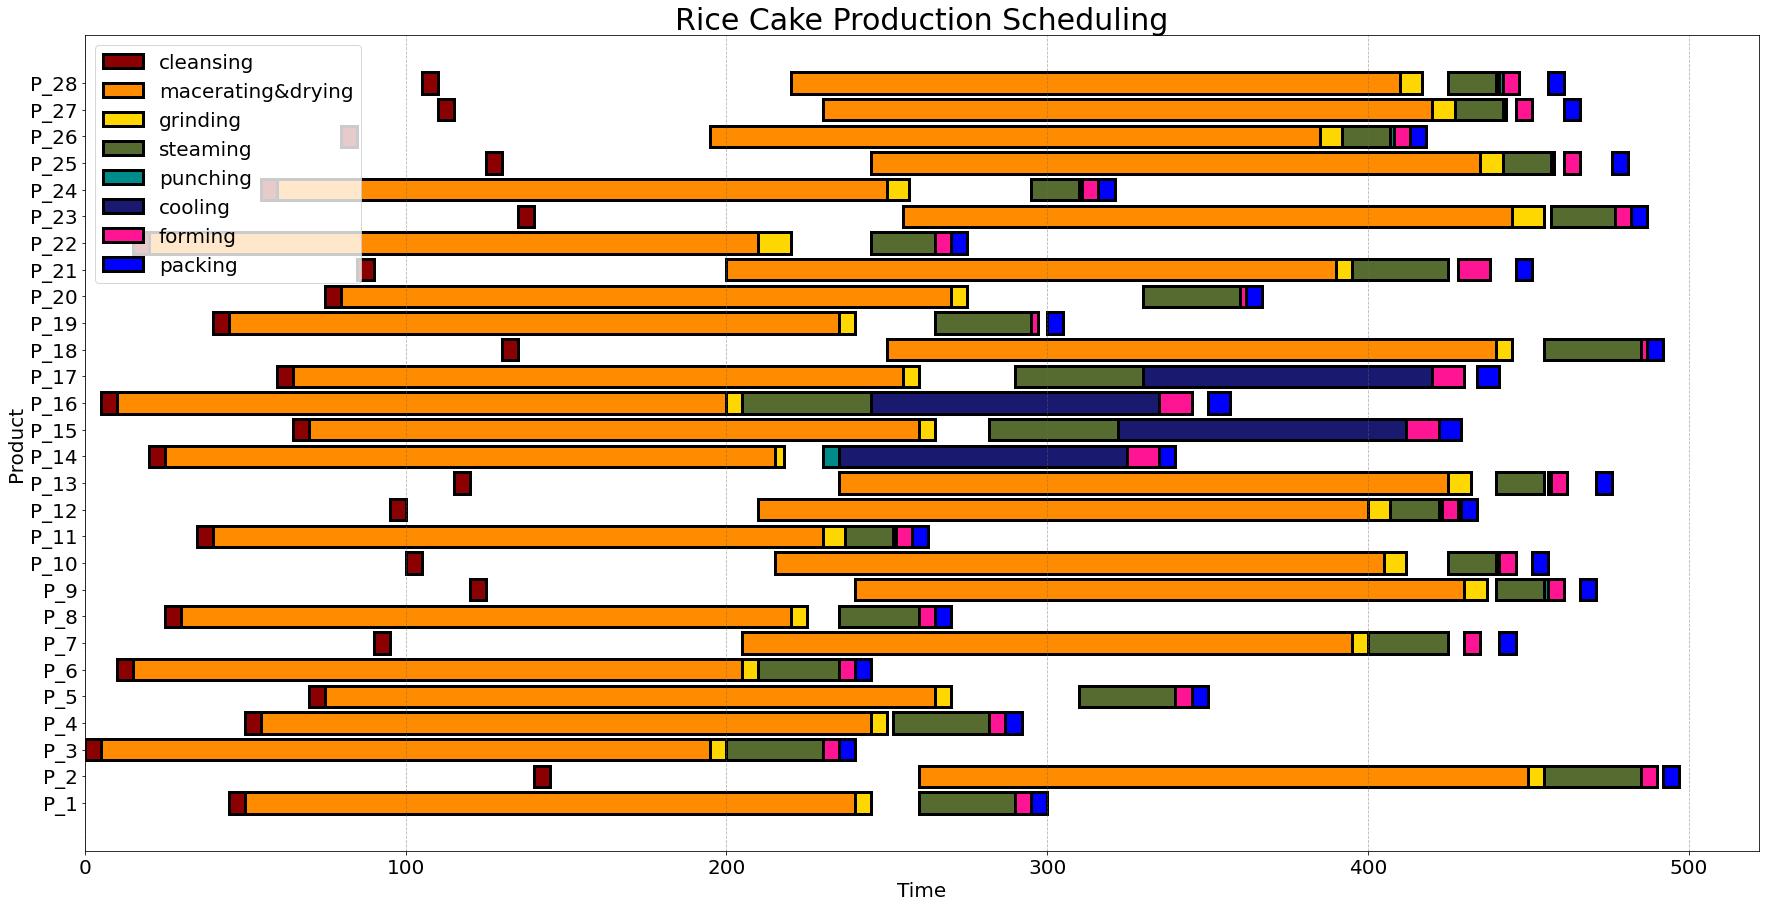

In [16]:
fig, ax = plt.subplots(1, figsize=(30,15), facecolor='white')
ax.barh(product_index,process_t[0], left=process_st[0],color='#8B0000',label='cleansing',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[1], left=process_st[1],color='#FF8C00',label='macerating&drying',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[2], left=process_st[2],color='#FFD700',label='grinding',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[3], left=process_st[3],color='#556B2F',label='steaming',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[4], left=process_st[4],color='#008B8B',label='punching',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[5], left=process_st[5],color='#191970',label='cooling',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[6], left=process_st[6],color='#FF1493',label='forming',edgecolor='black',linewidth=3)
ax.barh(product_index,process_t[7], left=process_st[7],color='b',label='packing',edgecolor='black',linewidth=3)
plt.title('Rice Cake Production Scheduling',size=(30))
plt.xlabel('Time',size=(20))
plt.ylabel('Product',size=(20))
plt.grid(True, axis='x', color='#696969', alpha=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('rice_cake_production_scheduling.png')
plt.show()

In [17]:
for i in best_chromosome[1:]:
    print(i)

[45, 140, 0, 50, 70, 10, 90, 25, 120, 100, 35, 95, 115, 20, 65, 5, 60, 130, 40, 75, 85, 15, 135, 55, 125, 80, 110, 105]
[50, 260, 5, 55, 75, 15, 205, 30, 240, 215, 40, 210, 235, 25, 70, 10, 65, 250, 45, 80, 200, 20, 255, 60, 245, 195, 230, 220]
[240, 450, 195, 245, 265, 205, 395, 220, 430, 405, 230, 400, 425, 215, 260, 200, 255, 440, 235, 270, 390, 210, 445, 250, 435, 385, 420, 410]
[260, 455, 200, 252, 310, 210, 400, 235, 440, 425, 237, 407, 440, 230, 282, 205, 290, 455, 265, 330, 395, 245, 457, 295, 442, 392, 427, 425]
[290, 485, 230, 282, 340, 235, 425, 260, 455, 440, 252, 422, 456, 230, 322, 245, 330, 485, 295, 360, 425, 265, 477, 310, 457, 407, 442, 441]
[290, 485, 230, 282, 340, 235, 425, 260, 456, 441, 253, 423, 457, 235, 322, 245, 330, 485, 295, 360, 425, 265, 477, 311, 458, 408, 443, 442]
[290, 485, 230, 282, 340, 235, 430, 260, 456, 441, 253, 423, 457, 325, 412, 335, 420, 485, 295, 360, 428, 265, 477, 311, 461, 408, 446, 442]
[295, 492, 235, 287, 345, 240, 441, 265, 466, 451,